In [317]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import animation
import PIL
from PIL import Image
import numpy as np
#from osgeo import gdal
import sklearn.preprocessing as sk
#from __future__ import division
import PIL
import cv2
from numpy.linalg import inv
import os
#os.chdir(r'/content/drive/My Drive/Manizales/Photo_treatment') 

import matplotlib.animation as animation

plt.rcParams['animation.ffmpeg_path'] = r'C:\Program Files (x86)\ffmpeg\bin\ffmpeg.exe'
import scipy.misc
import imageio
import itertools
#os.path.exists(r'C:\Program Files (x86)\ffmpeg\bin\ffmpeg.exe')

In [318]:
def generate_perlin_noise_2d(shape, res):
    def f(t):
        return 6*t**5 - 15*t**4 + 10*t**3
    
    delta = (res[0] / shape[0], res[1] / shape[1])
    d = (shape[0] // res[0], shape[1] // res[1])
    grid = np.mgrid[0:res[0]:delta[0],0:res[1]:delta[1]].transpose(1, 2, 0) % 1
    # Gradients
    angles = 2*np.pi*np.random.rand(res[0]+1, res[1]+1)
    gradients = np.dstack((np.cos(angles), np.sin(angles)))
    g00 = gradients[0:-1,0:-1].repeat(d[0], 0).repeat(d[1], 1)
    g10 = gradients[1:  ,0:-1].repeat(d[0], 0).repeat(d[1], 1)
    g01 = gradients[0:-1,1:  ].repeat(d[0], 0).repeat(d[1], 1)
    g11 = gradients[1:  ,1:  ].repeat(d[0], 0).repeat(d[1], 1)
    # Ramps
    n00 = np.sum(np.dstack((grid[:,:,0]  , grid[:,:,1]  )) * g00, 2)
    n10 = np.sum(np.dstack((grid[:,:,0]-1, grid[:,:,1]  )) * g10, 2)
    n01 = np.sum(np.dstack((grid[:,:,0]  , grid[:,:,1]-1)) * g01, 2)
    n11 = np.sum(np.dstack((grid[:,:,0]-1, grid[:,:,1]-1)) * g11, 2)
    # Interpolation
    t = f(grid)
    n0 = n00*(1-t[:,:,0]) + t[:,:,0]*n10
    n1 = n01*(1-t[:,:,0]) + t[:,:,0]*n11
    return np.sqrt(2)*((1-t[:,:,1])*n0 + t[:,:,1]*n1)
        
def generate_fractal_noise_2d(shape, res, octaves=1, persistence=0.5):
    noise = np.zeros(shape)
    frequency = 1
    amplitude = 1
    for _ in range(octaves):
        noise += amplitude * generate_perlin_noise_2d(shape, (frequency*res[0], frequency*res[1]))
        frequency *= 2
        amplitude *= persistence
    return noise



def fractal_generator(persistence, size):
    perlin = generate_fractal_noise_2d((size,size), (2,2), octaves=8, persistence=persistence)
    #perlin = (perlin)/np.max(np.max(abs(perlin)))
    #for i in range(len(perlin)):
    #    for j in range(len(perlin)):
    #        if perlin[i][j] >= 0:
    #            perlin[i][j] = 1
    #        elif perlin[i][j] < 0:
    #            perlin[i][j] = -1
    return perlin
def downSaturation(pictu, v): 

  #satuP = duplicatePicture(pictu)
  for pixel in Image.getpixel(pictu):
    r = getRed(pixel)
    g = getGreen(pixel)
    b = getBlue(pixel)
  # check if red is primary colour
    if r > g and r > b:
   # Saturate with red
      r = r - v
      if g < b:
        g = g + v
      else:
        b = b + v

    # check if green is primary colour
    if g > r and g > b:
     # Saturate with green
      g = g - v
      if r < b:
        r = r + v
      else:
        b = b + v

    # check if blue is primary colour
    if b > r and b > g:
     # Saturate with blue
      b = b - v
      if r < g:
        r = r + v
      else:
        g = g + v

    color = makeColor(r, g, b)
    setColor(pixel, color)
    explore(satuP)
    return satuP
  

#satup = downSaturation(new_p, 5)


def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

def Interpol(imageA, imageB, steps, direction = 0):
    inter_matrix = []
    steps = increments(steps, direction)
    imageA = Image.fromarray(imageA).convert('RGB') 
    imageB = Image.fromarray(imageB).convert('RGB') 
    for k in steps:
        PIL.Image.blend(imageA, imageB, k)
        outImage = np.asarray(imageA) * (1.0 - k) + np.asarray(imageB) * k
        inter_matrix.append(outImage)
        #final_matrix = np.array(inter_matrix).T
    return inter_matrix

def increments (steps, direction = 0):
    steps = int(100/steps)
    a = range(0,100,steps)
    b = [x for x in a]
    
    if direction == 1:
        c = b + [100]
        b.reverse()
        d = c + b
    else:
        c = b
        d = c
    e = [x/100 for x in d]
    return e

def InterpolMulti(size, list_image, steps, direction = 0):

    InterpolTemp = np.empty((0, size, size, 3))

    for first, second in zip(list_image, list_image[1:]):
        InterpolMatrix = Interpol(first, second, steps, direction)
        InterpolMatrix = np.array(InterpolMatrix)
        print(InterpolMatrix.shape)
        print(InterpolTemp.shape)
        InterpolTemp = np.vstack((InterpolTemp, InterpolMatrix))
    InterpolMulti = np.array(InterpolTemp)
    return InterpolMulti

def create_anim(img_arr):
    img = []
    for i in range(img_arr.shape[0]):
        im = plt.imshow(img_arr[i, :,:,:], animated=True)
        plt.axis('off')
        img.append([im])
    return img




def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [320]:
##Load Images from folder
folder = r'E:\Images\DeepDream\processed_siameses_it60_b05'
images = load_images_from_folder(folder)



In [242]:
size = 1280
im2x = fractal_generator(0.4, size)
imx = fractal_generator(0.3, size)
im4x = fractal_generator(0.5, size)
im3x = fractal_generator(0.6, size)
im2x = (255*(im2x - np.min(im2x))/np.ptp(im2x)).astype('uint8')
imx = (255*(imx - np.min(imx))/np.ptp(imx)).astype('uint8')
im4x = (255*(im4x - np.min(im4x))/np.ptp(im4x)).astype('uint8')
im3x = (255*(im3x - np.min(im3x))/np.ptp(im3x)).astype('uint8')

AttributeError: 'list' object has no attribute 'shape'

In [300]:
im = Image.open('test01.png')
im2 = Image.open('out01.png')
im3 = Image.open('out02.png')
im4 = Image.open('test04.png')
imx = np.array(im)
im2x = np.array(im2)
im3x = np.array(im3)
im4x = np.array(im4)

In [301]:
list_dd = [imx, im2x, im3x, im4x]

In [272]:



#imB = rgb2gray(imx)
#im2B = rgb2gray(im2x)
#sat = np.random.rand(1024, 1024)
#hue = np.full((1024, 1024), 0.05)
#imarray = np.array(image)
#imarray2 = np.array(image2)
im_RGB = np.stack((im3x+im2x-im4x, im2x-imx, imx), axis=2)
im_RGB2 = np.stack((im3x, im2x*2, imx), axis=2)
im_RGB3 = np.stack((im3x+(im4x*2-im2x), im2x*2, imx+im4x+im3x), axis=2)
im_RGB4 = np.stack((im3x-imx*im2x, im4x*2-imx*2, im4x-im3x-im2x*2), axis=2)
im_RGB5 = np.stack((im3x-imx+(im3x*4), im2x*2-imx-im2x, im2x.T+ im4x*2), axis=2)
im_RGB6 = np.stack((im3x-imx+im2x*2, im2x*2-imx-im4x, im4x-imx), axis=2)
#im_RGB.shape
img2 = Image.fromarray(im_RGB, mode='HSV')
img3 = Image.fromarray(im_RGB2, mode='HSV')
img4 = Image.fromarray(im_RGB3, mode='HSV')
img5 = Image.fromarray(im_RGB4, mode='HSV')
img6 = Image.fromarray(im_RGB5, mode='HSV')
img7 = Image.fromarray(im_RGB6, mode='HSV')
new_p = img2.convert('RGB')
new_p2 = img3.convert('RGB')
new_p3 = img4.convert('RGB')
new_p4 = img5.convert('RGB')
new_p5 = img6.convert('RGB')
new_p6 = img7.convert('RGB')

new_p = np.array(new_p)
new_p2 = np.array(new_p2)
new_p3 = np.array(new_p3)
new_p4 = np.array(new_p4)
new_p5 = np.array(new_p5)
new_p6 = np.array(new_p6)
list_image = [new_p, new_p2, new_p3, new_p4, new_p5, new_p6]

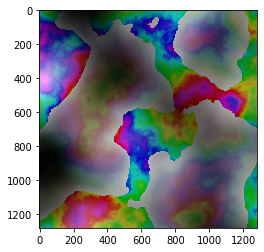

In [275]:
plt.imshow(new_p)

In [306]:
Interpol = InterpolMulti(1280, images, 30, direction = 0)
test_final = Interpol.astype('uint8')

(34, 1280, 1280, 3)
(0, 1280, 1280, 3)
(34, 1280, 1280, 3)
(34, 1280, 1280, 3)
(34, 1280, 1280, 3)
(68, 1280, 1280, 3)


In [214]:
test_final.shape

(136, 1024, 1024, 3)

In [ ]:
new_p = np.array(new_p)
new_p2 = np.array(new_p2)
test = Interpol(new_p, new_p2, 50, direction = 0)
test_final = np.array(test)
test_final = test_final.astype('uint8')

In [ ]:

#test_final = Image.fromarray(test_final[19], 'RGB')
#test_final

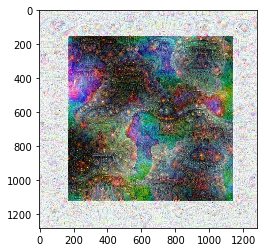

In [314]:
plt.imshow(test_final[10])

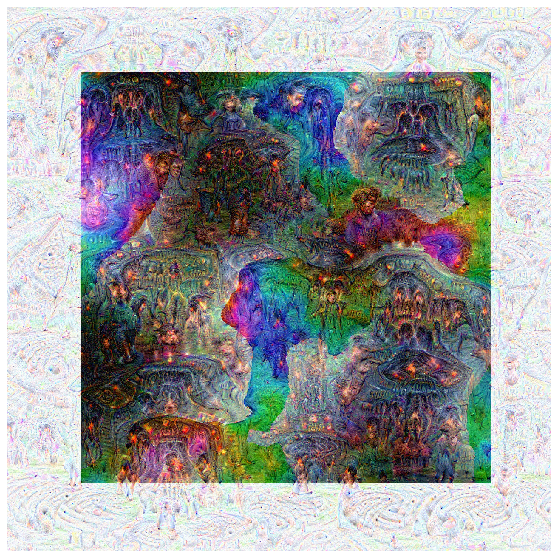

In [315]:
fig = plt.figure()
fig.set_size_inches(10, 10, True)
img = create_anim(test_final)

ani = animation.ArtistAnimation(fig, img, interval=120, blit=True,
                                    repeat_delay=None, repeat=False)

dpi = 128
writer = animation.writers['ffmpeg'](fps=20)
ani.save('test_dd_02.mp4',writer=writer,dpi=dpi)
#ani.save(("movie.mp4"), fps=18)#, writer='imagemagick', fps=20)
plt.show()

In [ ]:
choice = ['-', '+', '*']

In [ ]:
im_test.save("mani47.jpeg")

In [ ]:
im4 = np.array(im4)
fractal_dimension(im4)

In [ ]:
im2 = Image.open('D1.3_test.tif')
im3 = Image.open('D1.8_test.tif')
im4 = Image.open('D2.1_test.tif')

In [ ]:
# -----------------------------------------------------------------------------
# From https://en.wikipedia.org/wiki/Minkowski–Bouligand_dimension:
#
# In fractal geometry, the Minkowski–Bouligand dimension, also known as
# Minkowski dimension or box-counting dimension, is a way of determining the
# fractal dimension of a set S in a Euclidean space Rn, or more generally in a
# metric space (X, d).
# -----------------------------------------------------------------------------
import scipy.misc
import numpy as np


def fractal_dimension(Z, threshold=0.9):

    # Only for 2d image
    assert(len(Z.shape) == 2)

    # From https://github.com/rougier/numpy-100 (#87)
    def boxcount(Z, k):
        S = np.add.reduceat(
            np.add.reduceat(Z, np.arange(0, Z.shape[0], k), axis=0),
                               np.arange(0, Z.shape[1], k), axis=1)

        # We count non-empty (0) and non-full boxes (k*k)
        return len(np.where((S > 0) & (S < k*k))[0])


    # Transform Z into a binary array
    Z = (Z < threshold)

    # Minimal dimension of image
    p = min(Z.shape)

    # Greatest power of 2 less than or equal to p
    n = 2**np.floor(np.log(p)/np.log(2))

    # Extract the exponent
    n = int(np.log(n)/np.log(2))

    # Build successive box sizes (from 2**n down to 2**1)
    sizes = 2**np.arange(n, 1, -1)

    # Actual box counting with decreasing size
    counts = []
    for size in sizes:
        counts.append(boxcount(Z, size))

    # Fit the successive log(sizes) with log (counts)
    coeffs = np.polyfit(np.log(sizes), np.log(counts), 1)
    return -coeffs[0]

#I = scipy.misc.imread("sierpinski.png")/256.0
#print("Minkowski–Bouligand dimension (computed): ", fractal_dimension(I))
#print("Haussdorf dimension (theoretical):        ", (np.log(3)/np.log(2)))